In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

from sklearn.pipeline import make_pipeline
from utils import ImagePreprocessor, ImageClassifier

## Preparing Test Images

In [2]:
dataset_dir = "datasets"

_, test_dir, _ = sorted(os.listdir(dataset_dir))
test_dir = os.path.join(dataset_dir, test_dir)

In [3]:
test_df = pd.DataFrame(columns=["image", "class"])
for class_ in ImageClassifier.CLASSES:
    images = [os.path.join(test_dir, class_, image) for image in os.listdir(os.path.join(test_dir, class_))]
    class_df = pd.DataFrame(data={"image": images, "class": class_})
    test_df = test_df.append(class_df, ignore_index=True)

## Making Predictions

In [4]:
pipeline = make_pipeline(
    ImagePreprocessor(),
    ImageClassifier(),
)

In [8]:
%time y_preds = pipeline.predict(test_df['image'])

CPU times: user 5min 44s, sys: 34 s, total: 6min 18s
Wall time: 3min 49s


In [28]:
p_classes, p_probs = [class_[0] for class_ in y_preds], [prob[1] for prob in y_preds]

test_df['predicted_class'] = p_classes
test_df['confidence'] = p_probs

## Result Analysis

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [32]:
print(classification_report(test_df['class'], test_df['predicted_class'], digits=4))

              precision    recall  f1-score   support

   buildings     0.8970    0.8970    0.8970       437
      forest     0.9957    0.9789    0.9872       474
     glacier     0.8676    0.8174    0.8417       553
    mountain     0.8171    0.8762    0.8456       525
         sea     0.9375    0.9412    0.9393       510
      street     0.9142    0.9142    0.9142       501

    accuracy                         0.9020      3000
   macro avg     0.9048    0.9041    0.9042      3000
weighted avg     0.9029    0.9020    0.9021      3000



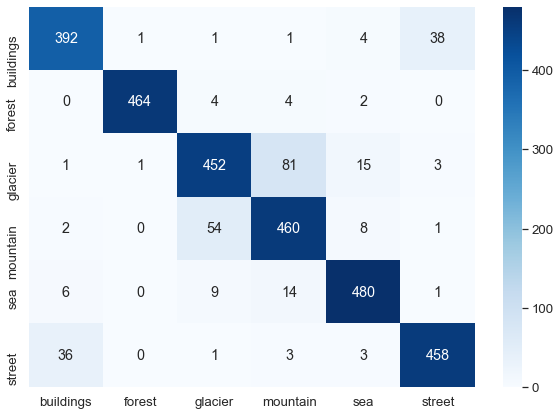

In [60]:
c_matrix = confusion_matrix(test_df['class'], test_df['predicted_class'], normalize=None)
c_matrix_df = pd.DataFrame(c_matrix, columns=ImageClassifier.CLASSES, index=ImageClassifier.CLASSES)
plt.figure(figsize=(10,7))
sn.heatmap(c_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.show()